# BI Assignment 3


### Prerequisites

In [1]:
isRunOnColab = False
if(isRunOnColab):
    from google.colab import drive
    drive.mount('/content/drive')

In [2]:
import nltk
# nltk.download('wordnet')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('seaborn-muted')

### Reading the data and exploration

In [5]:
path_to_file = ''
if(isRunOnColab):
    path_to_file = 'drive/MyDrive/bi_assignments/data/it_courses_udemy.csv'
else:
    path_to_file = 'it_courses_udemy.csv'
df = pd.read_csv(path_to_file)

In [6]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22853 non-null  int64  
 1   title                         22853 non-null  object 
 2   url                           22853 non-null  object 
 3   is_paid                       22853 non-null  bool   
 4   num_subscribers               22853 non-null  int64  
 5   avg_rating                    22853 non-null  float64
 6   avg_rating_recent             22853 non-null  float64
 7   rating                        22853 non-null  float64
 8   num_reviews                   22853 non-null  int64  
 9   is_wishlisted                 22853 non-null  bool   
 10  num_published_lectures        22853 non-null  int64  
 11  num_published_practice_tests  22853 non-null  int64  
 12  created                       22853 non-null  object 
 13  p

In [8]:
df.shape

(22853, 20)

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,22853.0,1.818466e+06,927352.464985,2762.0,1.090694e+06,1.824268e+06,2.604580e+06,3486006.0
num_subscribers,22853.0,3.205448e+03,11051.296472,0.0,7.600000e+01,5.590000e+02,2.483000e+03,564444.0
avg_rating,22853.0,3.952356e+00,0.875152,0.0,3.750000e+00,4.150000e+00,4.435480e+00,5.0
avg_rating_recent,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
rating,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
num_reviews,22853.0,2.702776e+02,2048.788093,0.0,8.000000e+00,2.700000e+01,9.800000e+01,188941.0
num_published_lectures,22853.0,3.491721e+01,48.652820,0.0,1.100000e+01,2.200000e+01,4.100000e+01,699.0
num_published_practice_tests,22853.0,3.752243e-01,1.160939,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.0
discount_price__amount,21024.0,4.862661e+02,234.100393,455.0,4.550000e+02,4.550000e+02,4.550000e+02,3200.0
price_detail__amount,22356.0,4.445518e+03,3098.531678,1280.0,1.280000e+03,3.200000e+03,8.640000e+03,12800.0


Transforming from string to date

In [10]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])

Adding date as integer

In [11]:
df['created_int'] = pd.to_numeric(df['created'])
df['published_time_int'] = pd.to_numeric(df['published_time'])

### Correlation matrix

In [267]:
corr = df.drop(columns=['id']).corr(method='spearman').round(1)

<AxesSubplot:>

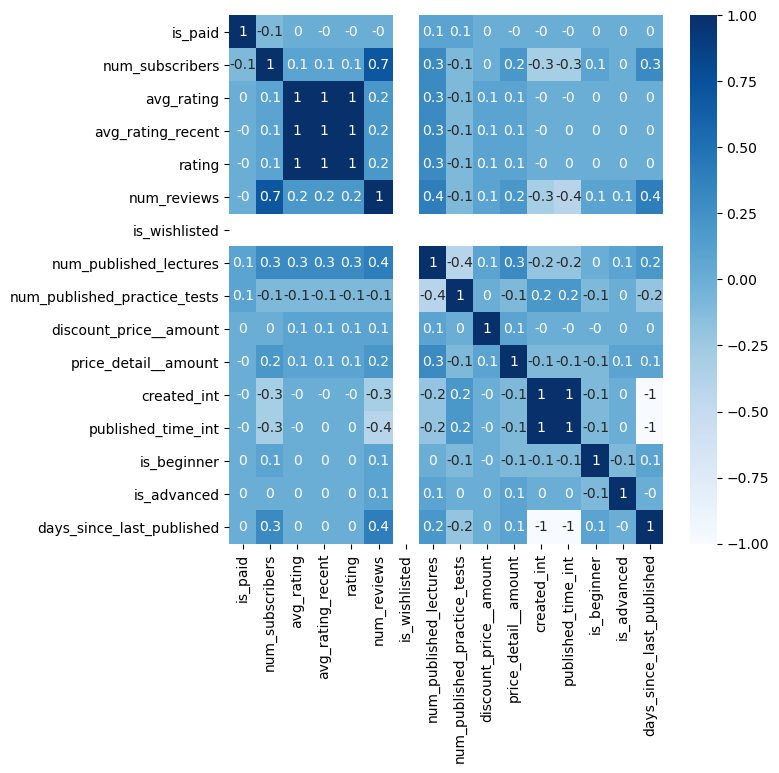

In [268]:
plt.figure(figsize=(7, 7), dpi=100)

sns.heatmap(corr,annot=True,xticklabels=True, cmap='Blues')

In [14]:
print(f'{np.round(df.is_paid.value_counts()[False] / df.shape[0] * 100)} % of courses are free')

2.0 % of courses are free


In [15]:
pd.to_datetime(df['published_time']).max() #mention: data up to september 2020

Timestamp('2020-09-10 06:31:11+0000', tz='UTC')

## Currency and NaNs

In [16]:
df.isna().sum() # how many null values each column has

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1829
discount_price__currency        1829
discount_price__price_string    1829
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
created_int                        0
published_time_int                 0
dtype: int64

In [17]:
df['discount_price__currency'].value_counts(dropna=False)

INR    21024
NaN     1829
Name: discount_price__currency, dtype: int64

For discounted price, we can look at which have null and are free. (probably all free have Null values here)
-> impute by setting these to 0

In [18]:
df['price_detail__currency'].value_counts(dropna=False)

INR    22356
NaN      497
Name: price_detail__currency, dtype: int64

For both `_currency` attributes we observe only one value and null values. There are two possible causes of these null values:
1. Course is free, therefore it has no price, price currency, discounted price and discounted price currency
2. Course is not free but was never discounted, meaning it has no discounted price nor discounted price currency.

In [19]:
df.loc[df['discount_price__currency'].isna() & df['is_paid']].shape[0] # number of paid and no discount price

1333

For these we can set the discount price to the original price. (they probably never had a discount)

In [20]:
outlier = df.loc[df['price_detail__currency'].isna() & df['is_paid']] #outlier
print(outlier)

outlier_indices = outlier.index


            id                                       title  \
13607  2935720  Acabou a Previdência e agora? -  Volume 03   

                                                   url  is_paid  \
13607  /course/acabou-a-previdencia-e-agora-volume-03/     True   

       num_subscribers  avg_rating  avg_rating_recent  rating  num_reviews  \
13607                0         0.0                0.0     0.0            0   

       is_wishlisted  ...                   created            published_time  \
13607          False  ... 2020-03-30 19:10:58+00:00 2020-04-02 16:33:32+00:00   

      discount_price__amount discount_price__currency  \
13607                    NaN                      NaN   

       discount_price__price_string price_detail__amount  \
13607                           NaN                  NaN   

      price_detail__currency  price_detail__price_string          created_int  \
13607                    NaN                         NaN  1585595458000000000   

        published_tim

## Plotting the attribute distributions

<BarContainer object of 2 artists>

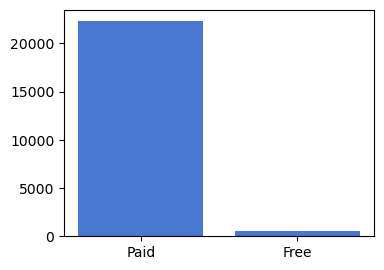

In [21]:
plt.figure(figsize=(4, 3), dpi=100)
plt.bar(['Paid', 'Free'] , df.is_paid.value_counts())

(array([2.1416e+04, 8.6500e+02, 2.8700e+02, 1.1200e+02, 4.6000e+01,
        3.5000e+01, 2.2000e+01, 1.9000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.  ,  11288.88,  22577.76,  33866.64,  45155.52,  56444.4 ,
         67733.28,  79022.16,  90311.04, 101599.92, 112888.8 , 124177.68,
        135466.56, 146755.44, 158044.32, 169333.2 , 180622.08, 191910.96,
        203199.84, 214488.72, 225777.6 , 237066.48, 248355.36, 259644.24,
        270933.12, 282

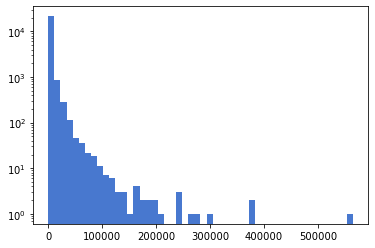

In [22]:
plt.hist(df['num_subscribers'], bins=50, log=True)

(array([2.150e+02, 0.000e+00, 1.690e+02, 0.000e+00, 1.210e+02, 9.900e+01,
        1.860e+02, 2.010e+02, 2.000e+02, 4.080e+02, 4.110e+02, 6.090e+02,
        6.100e+02, 6.240e+02, 7.870e+02, 7.930e+02, 7.190e+02, 7.710e+02,
        7.990e+02, 7.230e+02, 7.550e+02, 7.530e+02, 7.690e+02, 7.890e+02,
        8.190e+02, 9.330e+02, 1.237e+03, 1.039e+03, 1.073e+03, 1.015e+03,
        9.510e+02, 8.500e+02, 7.730e+02, 5.980e+02, 5.140e+02, 4.130e+02,
        3.380e+02, 2.480e+02, 2.000e+02, 1.190e+02, 8.300e+01, 4.700e+01,
        3.700e+01, 2.400e+01, 1.000e+01, 1.000e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.        ,  0.26487196,  0.52974393,  0.79461589,  1.05948786,
         1.32435982,  1.58923179,  1.85410375,  2.11897572,  2.38384768,
         2.64871965,  2.91359161,  3.17846357,  3.44333554,  3.7082075 ,
         3.97307947,  4.23795143,  4.5028234 ,  4.76769536,  5.03256733,
         5.29743929,  5.56231126,  5.82718322,  6.09205518,  6.35692715,
         6.

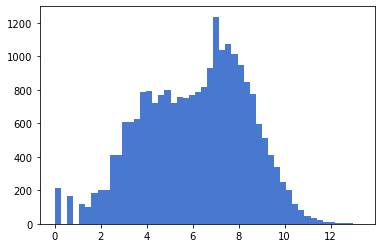

In [23]:
plt.hist(np.log(1+df['num_subscribers']), bins=50)
# plt.hist(df['num_subscribers'], bins=50)

(array([6.840e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.600e+01, 3.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 9.000e+00, 7.000e+00,
        2.000e+01, 7.000e+00, 4.900e+01, 2.500e+01, 4.100e+01, 6.000e+01,
        8.000e+00, 1.010e+02, 8.300e+01, 1.540e+02, 1.410e+02, 6.900e+01,
        3.170e+02, 2.540e+02, 4.730e+02, 4.880e+02, 2.620e+02, 8.180e+02,
        8.120e+02, 1.411e+03, 1.242e+03, 7.650e+02, 2.368e+03, 1.335e+03,
        1.987e+03, 2.187e+03, 1.862e+03, 2.175e+03, 8.460e+02, 8.540e+02,
        2.940e+02, 5.850e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

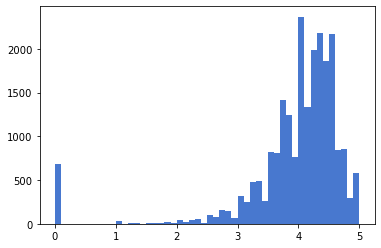

In [24]:
plt.hist(df['avg_rating'], bins=50)

### Number of courses created / published over the years

Text(0, 0.5, 'Number of courses')

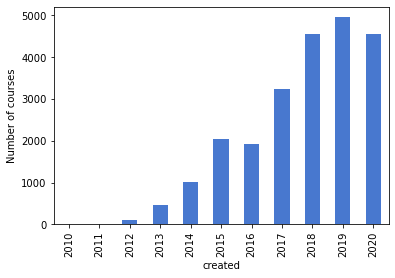

In [25]:
df.groupby(df["created"].dt.year)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses')

<AxesSubplot:xlabel='published_time'>

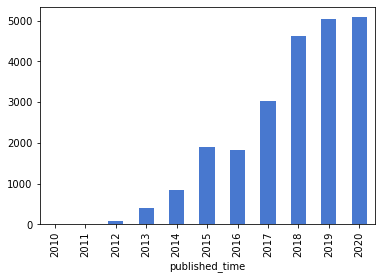

In [26]:
df.groupby(df["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)

#### Marking beginner courses based on the contents of the `title`

In [27]:
# is a beginner course
beginners_courses_idx = df['title'].str.contains('begin|start|intro|fundamental|basic|101|how to|foundation|rookie',case=False)
df['is_beginner'] = beginners_courses_idx


<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_beginner'>

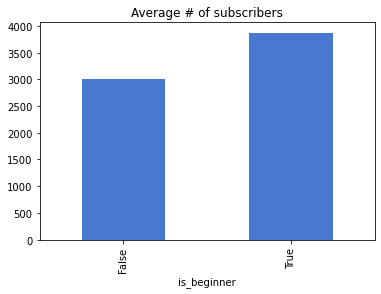

In [28]:
df.groupby(df["is_beginner"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

In [29]:
advanced_idx = df['title'].str.contains('advanced|master|expert|professional',case=False)
df["is_advanced"] = advanced_idx

<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_advanced'>

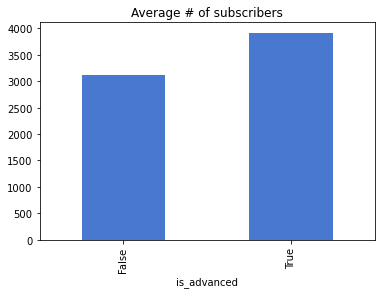

In [30]:
df.groupby(df["is_advanced"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

### Analysis of titles

In the following, the most common title terms* are extracted.

\* \- extracted tokens (without stopwords) were lemmatized (i.e. reduced to their dictionary form)

In [31]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to extract and stem the words from a column
def extract_terms(column):
    # Tokenize the words in the column
    words = word_tokenize(" ".join(df[column]))
    # Remove symbols and stopwords
    cleaned_words = [word for word in words if (word.isalpha() and word.lower() not in stop_words)]
    # Stem the words
    print('The' in cleaned_words)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    # Count the most common terms
    print('lemmatized')
    print('The' in lemmatized_words)
    common_terms = [term[0] for term in Counter(lemmatized_words).most_common(10)]
    return (common_terms, lemmatized_words)

# Extract the terms from the 'text' column
common_terms, lemmatized_words = extract_terms("title")

False
lemmatized
False


In [32]:
common_terms = [term for term in Counter(lemmatized_words).most_common(20)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

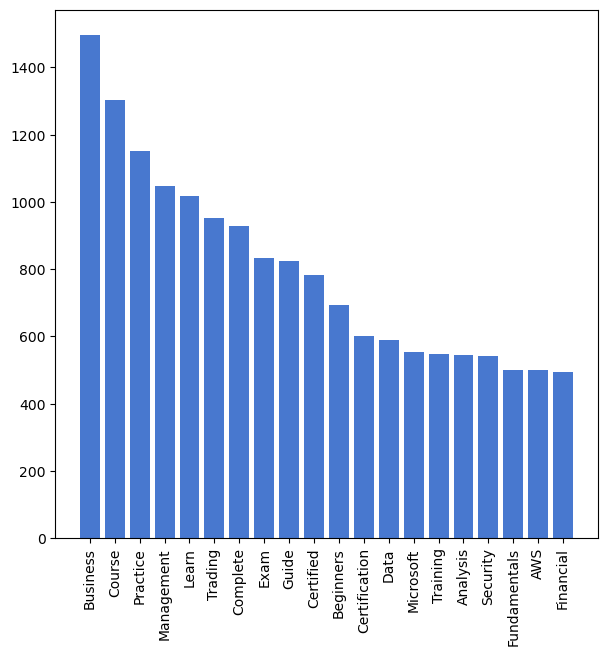

In [266]:
plt.figure(figsize=(7, 7), dpi=100)
plt.bar(*zip(*common_terms))
plt.xticks(rotation=90)

#### Days since last published

In [34]:
from pandas.io.formats.info import DataFrameTableBuilderNonVerbose
lastpublished = pd.to_datetime(df['published_time']).max()

df['days_since_last_published'] = (lastpublished - pd.to_datetime(df['published_time'])).dt.days  

In [35]:
df['days_since_last_published']

0        1618
1        1478
2        1030
3        1694
4        1703
         ... 
22848     955
22849     990
22850     721
22851     638
22852    1892
Name: days_since_last_published, Length: 22853, dtype: int64

In [36]:
df['days_since_last_published'].corr(df['num_subscribers'])

0.08774825332799722

## Notes 
Incorporate published_time >> relevant for popularity. If more recent -> needs less subscribers

Treat as time series (take most recent data points for testing)

Add to additional data requirements: 
    When did subscribers subscribe (maximal number of subscribers over all years)
       there might be less subs now if the course is old and the content of the course is outdated etc.

Consider the old courses (2010-2014) because there are very few of them. How to handle them. The data is probably not relevant. 

Consider the updates of the courses (some are updated some are not) consider updated_timestamp (which are not present in current dataset).


Converting the price after modeling (for the company management)

✅ Avg/total number of subs per year (based on `published_time`). -> interesting for marketing and sales 

Is published date == updated date? unclear

✅ look at (published-created) distribution ---->>> Derived attribute (daysinbetweendates/int)

✅ Are there courses with same/similar titles? (e.g. `VU Business Intelligence WS2022` and `VU Business Intelligence WS2023`


## Courses with similar / same titles

In [37]:
first_3_chars = df['title'].str[:30]
duplicated_rows = df[first_3_chars.duplicated()]
print(duplicated_rows.shape[0])
duplicated_rows.sort_values('title')

1133


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
22550,2662338,1Z0-068 : Oracle Database 12c: RAC and Grid Pr...,/course/1z0-068-oracle-database-12c-rac-and-gr...,True,116,4.83333,4.83896,4.83896,3,False,...,INR,₹455,1280.0,INR,"₹1,280",1574143081000000000,1574345032000000000,False,False,293
19111,3074042,1Z0-1072 Oracle Cloud Infrastructure 2019 Arch...,/course/1z0-1072-oracle-cloud-infrastructure-2...,True,68,4.22727,4.10804,4.10804,20,False,...,INR,₹455,1920.0,INR,"₹1,920",1588285857000000000,1588288989000000000,False,False,132
20327,3362370,1Z0-1084-20 Oracle Cloud Infrastructure Develo...,/course/1z0-1084-20-oracle-cloud-infrastructur...,True,107,4.59091,4.60577,4.60577,11,False,...,INR,₹455,1280.0,INR,"₹1,280",1595611799000000000,1595892180000000000,False,False,44
18334,3060372,1Z0-1085-20 Oracle Cloud Infrastructure Founda...,/course/1z0-1085-20-oracle-cloud-infrastructur...,True,61,4.45000,4.64272,4.64272,30,False,...,INR,₹455,1280.0,INR,"₹1,280",1588016108000000000,1588025959000000000,True,False,135
22812,3078234,1Z0-931 - Oracle Autonomous Database Cloud 201...,/course/1z0-931-oracle-autonomous-database-clo...,True,2,3.25000,3.05000,3.05000,2,False,...,INR,₹455,1280.0,INR,"₹1,280",1588373639000000000,1588382382000000000,False,False,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,1665560,Windows Server 2016 with Powershell: Using WMI...,/course/windows-server-2016-with-powershell-us...,True,113,3.00000,3.10006,3.10006,19,False,...,INR,₹455,8640.0,INR,"₹8,640",1524828896000000000,1525290260000000000,False,False,861
21246,1551046,Windows Server 2016 with Powershell: Working w...,/course/windows-server-2016-with-powershell-wo...,True,86,4.71429,4.56666,4.56666,7,False,...,INR,₹455,7680.0,INR,"₹7,680",1518428682000000000,1519268079000000000,False,False,931
10481,951218,You can Pass the Certified Management Accounta...,/course/cma-exam-2-review-financial-decision-m...,True,141,3.91667,3.69408,3.69408,6,False,...,INR,₹455,1280.0,INR,"₹1,280",1473140351000000000,1490043946000000000,False,False,1269
15449,2918344,[NEW] AWS Certified Cloud Practitioner From Sc...,/course/aws-certified-cloud-practitioner-exam-...,True,20011,4.22000,4.22587,4.22587,175,False,...,INR,₹640,2560.0,INR,"₹2,560",1585282434000000000,1591231801000000000,False,False,98


Text(0, 0.5, '# of courses with this name')

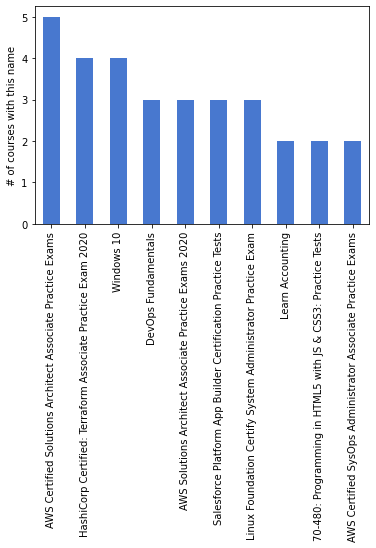

In [38]:
df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(10).plot(kind="bar")
plt.ylabel("# of courses with this name")

In [39]:
print(f"All courses with name: {df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]}\n (the course with the most identical titles)")

All courses with name: AWS Certified Solutions Architect Associate Practice Exams
 (the course with the most identical titles)


In [40]:
most_frequent_course_instances= df.loc[df['title'] == df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]]

In [41]:
most_frequent_course_instances['created']

13634   2018-01-22 01:22:04+00:00
13713   2018-08-27 02:20:35+00:00
17107   2020-01-02 06:14:20+00:00
17264   2020-05-12 06:34:26+00:00
19582   2020-01-28 22:56:56+00:00
Name: created, dtype: datetime64[ns, UTC]

We see that the course was was created twice in 2018 (summer and winter semester?)
twice in jan of 2020, might be an artefact

In [42]:
(df['url'].duplicated()).any()

False

No duplicated urls.

Example of two different urls for the AWS course:

In [43]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][14054]

'/course/aws-certified-cloud-practitioner-practice-exams-amazon/'

In [44]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][18168]


'/course/aws-certified-cloud-practitioner-practice-exam-o/'

## Published_date - created_date distribution

In [45]:
date_diff = (df['published_time'] - df['created']).dt.days

In [46]:
date_diff.describe()

count    22853.000000
mean        49.519275
std        124.580745
min         -1.000000
25%          3.000000
50%         12.000000
75%         40.000000
max       2186.000000
dtype: float64

Mean is 50, but Median (0.5 quantile) is more robust towards outliers -> on average we could say that 12 days passes between course creation and course publishing.

There is -1??? (published one day before created)

In [47]:
df.loc[date_diff == -1]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
686,2762,Simple Strategy for Swing Trading the Stock Ma...,/course/swing-trading-the-stock-market/,True,2268,4.21642,4.22936,4.22936,674,False,...,INR,₹468,2560.0,INR,"₹2,560",1271280766000000000,1271262766000000000,False,False,3801


Following is the distribution of the duration between publishing and course creation (y on the log scale)

Text(0, 0.5, 'Frequency')

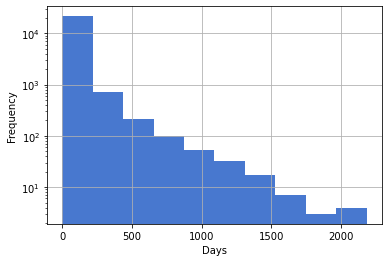

In [48]:
date_diff.hist( log=True)
plt.xlabel('Days')
plt.ylabel('Frequency')

## Avg num of subscribers / rating for paid vs free courses

([<matplotlib.axis.XTick at 0x22de546d280>,
 [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

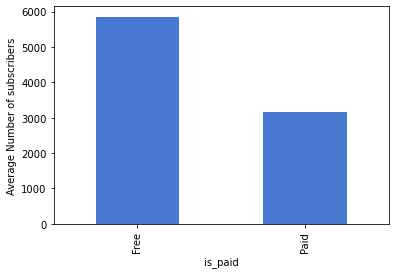

In [49]:
df.groupby(df["is_paid"])['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel("Average Number of subscribers")
plt.xticks(ticks=[0, 1] , labels=['Free', 'Paid'])

([<matplotlib.axis.XTick at 0x22dea60d100>,
 [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

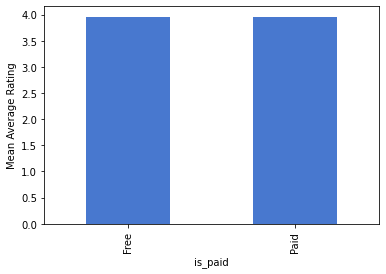

In [50]:
df.groupby(df["is_paid"])['avg_rating'].mean().plot(kind="bar", legend=False)
plt.ylabel("Mean Average Rating")
plt.xticks(ticks=[0, 1] , labels=['Free', 'Paid'])

On average free courses have around two times more subscribers than paid courses, while both paid and free courses have approximately equal mean average ratings. (Mean average because the `avg_rating` is already an average)

### Courses with no subscribers

How many:

In [51]:
df.loc[df["num_subscribers"] < 1].shape[0]

215

When were these courses created:

Text(0.5, 0, 'Year of publishing')

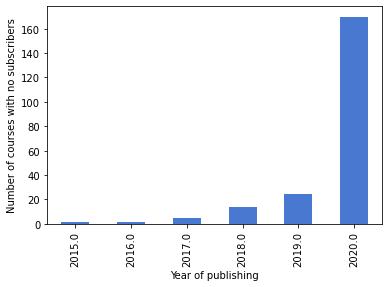

In [52]:
no_subs = df.loc[df["num_subscribers"] < 1]
df.groupby(no_subs["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses with no subscribers')
plt.xlabel('Year of publishing')

What percentage of courses from 2020 have 0 subscribers:

In [53]:
ratio_no_subs_in2020 = no_subs["published_time"].dt.year.value_counts()[2020]/df["published_time"].dt.year.value_counts()[2020]
print(f'{np.round(ratio_no_subs_in2020 * 100, 2)} %')

3.34 %


Rows that have no subscribers but at least one review:

In [54]:
df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]

<ipython-input-54-01bd099cb5b5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.00,3.00000,3.00000,1,False,...,INR,₹455,1280.0,INR,"₹1,280",1567584063000000000,1568161438000000000,False,False,365
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.00,5.00000,5.00000,1,False,...,NaN,NaN,2240.0,INR,"₹2,240",1588994549000000000,1589747850000000000,False,False,115
12905,3149864,Planilha Pronta - Conciliação Bancária,/course/planilha-pronta-conciliacao-bancaria/,True,0,2.75,3.19403,3.19403,2,False,...,INR,₹455,1280.0,INR,"₹1,280",1589978672000000000,1589984848000000000,False,False,112
13049,3428016,Forex MasterClass de Cero a Avanzado- Ejemplos...,/course/forex-masterclass-de-cero-a-avanzado-e...,True,0,5.00,5.00000,5.00000,1,False,...,NaN,NaN,12800.0,INR,"₹12,800",1597708770000000000,1598045671000000000,False,True,19


Since there are only few of such rows, we assume a user cannot unsubscribe from the course. Therefore we will remove them and consider them as outliers.

In [55]:
outlier_indices.append(df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1].index)

<ipython-input-55-619d36770e94>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices.append(df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1].index)


Int64Index([13607, 10898, 10950, 12905, 13049], dtype='int64')

## Number of subscribers over the years for all courses

---



Text(0.5, 0, 'Year of publishing')

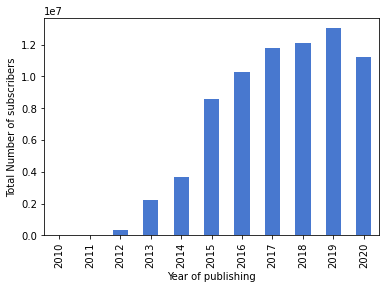

In [56]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].sum().plot(kind="bar", legend=False)
plt.ylabel('Total Number of subscribers')
plt.xlabel('Year of publishing')

Text(0.5, 0, 'Year of publishing')

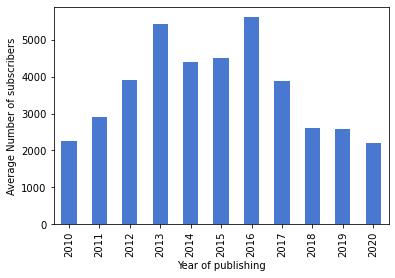

In [57]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel('Average Number of subscribers')
plt.xlabel('Year of publishing')

The first plot could be informative for the sales department. As expected with any company, after reaching the saturation of users, the total number of subscribers per year does not change drastically after a certain point.
 
Second, not so sure where it could be used. Maybe to analyze the average course quality over the years. i.e. maybe the content of the courses from 2013 and 2016 was of higher quality on average than for other years

Text(0.5, 0, 'Year of publishing')

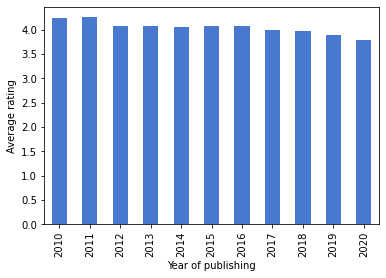

In [58]:
df.groupby(df["published_time"].dt.year)['rating'].mean().plot(kind="bar", legend=False)
plt.ylabel('Average rating')
plt.xlabel('Year of publishing')

Text(0.5, 0, 'Month')

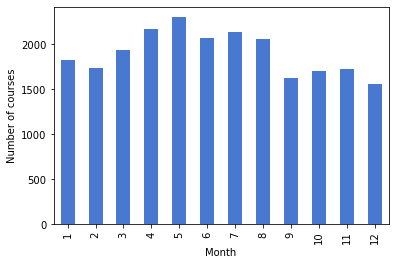

In [59]:
df.groupby(df["published_time"].dt.month)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses')
plt.xlabel('Month')

### Rating and related attributes

Here the highly correlated attributes: `avg_rating`, `avg_rating_recent` and `rating` are examined and the decision is made which one should be selected for modeling. 

In [60]:
df[['avg_rating', 'avg_rating_recent', 'rating'
   ]].describe()

,avg_rating,avg_rating_recent,rating
count,22853.000000,22853.000000,22853.000000
mean,3.952356,3.937739,3.937739
std,0.875152,0.888605,0.888605
min,0.000000,0.000000,0.000000
25%,3.750000,3.732460,3.732460
50%,4.150000,4.148680,4.148680
75%,4.435480,4.433520,4.433520
max,5.000000,5.000000,5.000000


Since all three have the same range, we can select either the `rating` or `avg_rating_recent` based on the variance, as it can be an indicator for information content. `rating` will be selected.

### Correlation matrix after adding the derived attributes

In [61]:
corr = df.drop(columns=['id']).corr(method='spearman').round(1)

<AxesSubplot:>

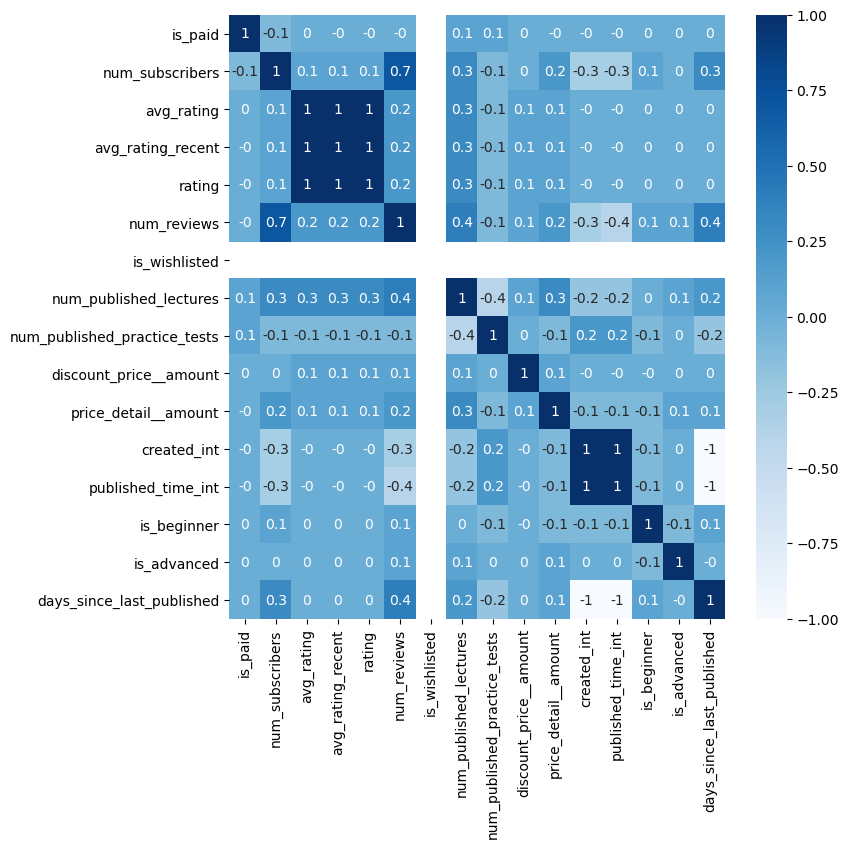

In [62]:
plt.figure(figsize=(8, 8), dpi=100)

sns.heatmap(corr,annot=True,xticklabels=True, cmap='Blues')

### Discounted courses analysis

In [63]:
# Are there courses that were paid but on discount free?
(df.loc[(df['discount_price__amount'] == 0) 
                       & (df['discount_price__amount'] != df['price_detail__amount'])]).shape[0] > 0

False

Creating discounted courses dataframe:

In [64]:
discounted_df = df.loc[(df['discount_price__amount'].isna() == False) 
                       & (df['discount_price__amount'] != df['price_detail__amount'])]

In [65]:
pd.options.mode.chained_assignment = None # suppressing the warning
discount = discounted_df['price_detail__amount'] - discounted_df['discount_price__amount']
discounted_df['discount'] = discount # calculate discount

Discount percentages: (discount/original_price)

In [66]:
discounted_df['discount_perc'] = discounted_df['discount'] *100 / discounted_df['price_detail__amount']

(array([  75.,    0.,   17.,   21., 5670., 1285., 1449., 1271., 2314.,
        8922.]),
 array([40.625    , 46.0546875, 51.484375 , 56.9140625, 62.34375  ,
        67.7734375, 73.203125 , 78.6328125, 84.0625   , 89.4921875,
        94.921875 ]),
 <BarContainer object of 10 artists>)

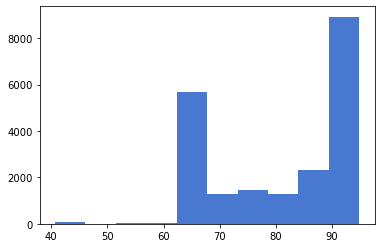

In [67]:
plt.hist(discounted_df['discount_perc'])

Distribution details of discount percentage:

In [68]:
discounted_df['discount_perc'].describe()

count    21024.000000
mean        81.433631
std         12.655682
min         40.625000
25%         64.453125
50%         85.781250
75%         94.531250
max         94.921875
Name: discount_perc, dtype: float64

Most common discounted prices

In [69]:
discounted_df['discount_price__amount'].value_counts().iloc[:5]

455.0     19700
468.0       231
700.0       164
481.0       137
3200.0       74
Name: discount_price__amount, dtype: int64

Most common course prices

In [70]:
discounted_df['price_detail__amount'].value_counts().iloc[:5]

1280.0    5654
8640.0    5185
6400.0    1540
3200.0    1514
1600.0    1246
Name: price_detail__amount, dtype: int64

### Examining most popular courses

Selecting the courses with top 10% num_subs and rating.

In [71]:
five_perc_n = int(0.1 * df.shape[0])

lower_bound_nr_subs = df['num_subscribers'].sort_values(ascending=False)[:five_perc_n].min()
lower_bound_rating = df['rating'].sort_values(ascending=False)[:five_perc_n].min()

In [72]:
most_popular_courses = df.loc[(df['num_subscribers'] >= lower_bound_nr_subs) 
       & (df['rating'] >= lower_bound_rating)]

In [73]:
most_popular_courses.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_int,published_time_int,days_since_last_published
count,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,128.000000,133.000000,1.340000e+02,1.340000e+02,134.000000
mean,1.637449e+06,24076.171642,4.659131,4.699253,4.699253,3623.604478,100.932836,0.216418,477.992188,6156.992481,1.510958e+18,1.515107e+18,978.888060
std,9.019794e+05,35676.960418,0.085562,0.053406,0.053406,8756.235944,109.559281,0.617562,126.398850,3230.437156,5.910103e+16,5.912384e+16,684.290716
min,2.797000e+04,7379.000000,4.350000,4.641250,4.641250,9.000000,0.000000,0.000000,455.000000,1280.000000,1.351360e+18,1.351554e+18,13.000000
25%,9.577890e+05,9392.000000,4.634620,4.660165,4.660165,185.750000,33.000000,0.000000,455.000000,2240.000000,1.473798e+18,1.478210e+18,449.750000
50%,1.591128e+06,13321.000000,4.667190,4.686770,4.686770,1118.500000,64.000000,0.000000,455.000000,8320.000000,1.520753e+18,1.525072e+18,863.500000
75%,2.357828e+06,22307.250000,4.703372,4.719450,4.719450,3221.000000,121.500000,0.000000,455.000000,8640.000000,1.557285e+18,1.560829e+18,1405.750000
max,3.447860e+06,295509.000000,4.900000,4.988870,4.988870,78006.000000,699.000000,4.000000,1280.000000,12800.000000,1.598357e+18,1.598551e+18,2872.000000


Text(0.5, 0, 'Year of publishing')

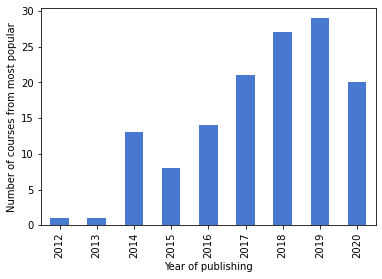

In [74]:
most_popular_courses.groupby(most_popular_courses["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses from most popular')
plt.xlabel('Year of publishing')

Very interesting is that the majority of the most popular courses are from the last 4 years. Even though the (on average) most subscribed courses are from 2013-2016.

##### Analyzing prices

Text(0.5, 0, 'Price')

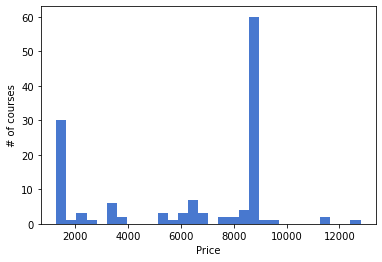

In [75]:
plt.hist(most_popular_courses['price_detail__amount'], bins=30)
plt.ylabel('# of courses')
plt.xlabel('Price')

Two most common prices:


In [76]:
most_popular_courses.price_detail__amount.value_counts().iloc[:2]

8640.0    60
1280.0    30
Name: price_detail__amount, dtype: int64

#### Discounts:

Text(0.5, 0, 'Discount price')

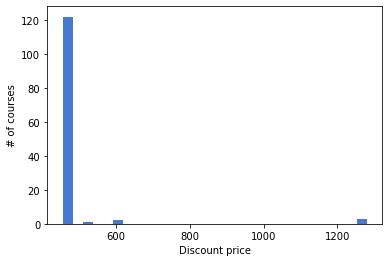

In [77]:
plt.hist(most_popular_courses['discount_price__amount'], bins=30)
plt.ylabel('# of courses')
plt.xlabel('Discount price')

Expected because around 85% of the discount prices are equal to 455. And the customers typically buy popular courses when they are on sale.

###### Number of published lectures

Text(0.5, 0, '# lectures')

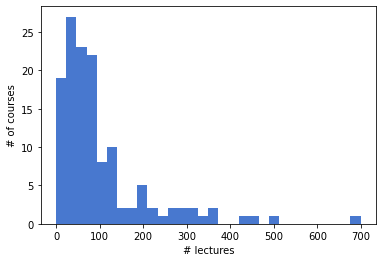

In [78]:
plt.hist(most_popular_courses['num_published_lectures'], bins=30)
plt.ylabel('# of courses')
plt.xlabel('# lectures')

Obviously courses with less than 100 lectures are more common. Because they are easier to follow.

###### Number of tests

Text(0.5, 0, '# practice tests')

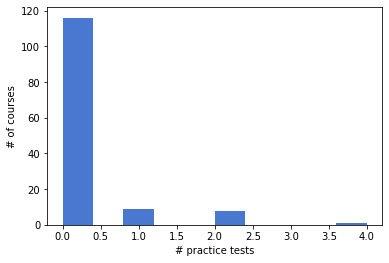

In [79]:
plt.hist(most_popular_courses['num_published_practice_tests'])
plt.ylabel('# of courses')
plt.xlabel('# practice tests')

Majority of popular courses does not have practice tests. We assume students are typically focusing on the lectures and less on testing aspect.

##### Is paid?

In [80]:
most_popular_courses.is_paid.value_counts()

True     133
False      1
Name: is_paid, dtype: int64

Majority of popular courses are indeed not free!

## Profit

In [81]:
profit = (df['price_detail__amount'] * df['num_subscribers']).fillna(0)

In [82]:
profit_df = df.copy()
profit_df['profit']= profit

Text(0.5, 0, 'Year')

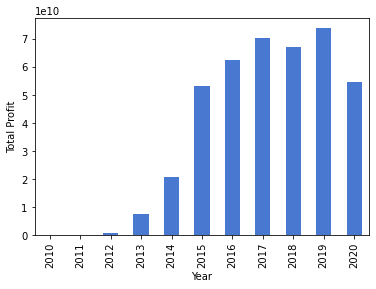

In [83]:
profit_df.groupby(profit_df["published_time"].dt.year)['profit'].sum().plot(kind="bar", legend=False)
plt.ylabel('Total Profit')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

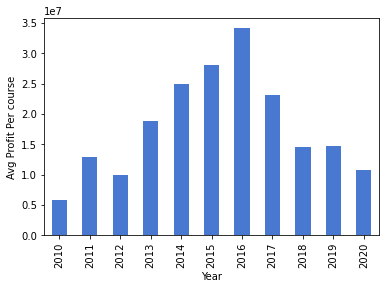

In [84]:
profit_df.groupby(profit_df["published_time"].dt.year)['profit'].mean().plot(kind="bar", legend=False)
plt.ylabel('Avg Profit Per course')
plt.xlabel('Year')

Text(0, 0.5, 'Number of lectures published')

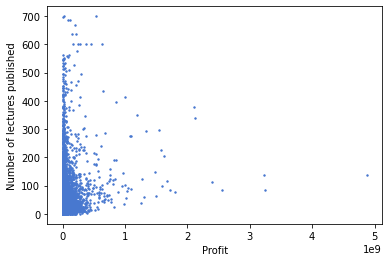

In [85]:
plt.scatter(profit_df['profit'], profit_df['num_published_lectures'],s=2)
plt.xlabel('Profit')
plt.ylabel('Number of lectures published')

Text(0, 0.5, 'Number of tests published')

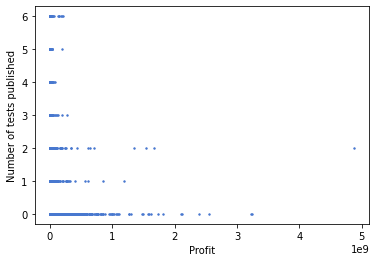

In [86]:
plt.scatter(profit_df['profit'], profit_df['num_published_practice_tests'],s=2)
plt.xlabel('Profit')
plt.ylabel('Number of tests published')

## Data preparation

### Removing the 5 outliers

In [87]:
df = df.drop(outlier_indices)

## Splitting the data

In [88]:
# sorted by days_since_last_published (ascending) 
sorted = df.sort_values('days_since_last_published').reset_index(drop=True)

num_of_obs_for_testing = int(np.round(sorted.shape[0] * 0.2))
print(f"For testing: {num_of_obs_for_testing}")

test_set = sorted.iloc[:num_of_obs_for_testing, :]
rest = sorted.iloc[num_of_obs_for_testing:, :]

X_test = test_set.drop(columns='num_subscribers')
y_test = test_set['num_subscribers']

For testing: 4570


In [89]:
test_set.published_time

0      2020-09-10 06:31:11+00:00
1      2020-09-08 20:22:19+00:00
2      2020-09-09 02:11:42+00:00
3      2020-09-08 19:55:04+00:00
4      2020-09-08 21:12:24+00:00
                  ...           
4565   2020-02-04 17:59:29+00:00
4566   2020-02-04 17:57:32+00:00
4567   2020-02-04 09:08:06+00:00
4568   2020-02-04 17:46:41+00:00
4569   2020-02-04 19:25:42+00:00
Name: published_time, Length: 4570, dtype: datetime64[ns, UTC]

In testing set: observations from 04.02.2020 until 10.09.2020

In [90]:
print("Number of observations before 2015:")
rest.shape[0] - rest[rest.published_time.dt.year >= 2015].shape[0]

Number of observations before 2015:


1338

Observations before 2015 discarded

In [91]:
from sklearn.model_selection import train_test_split

rest = rest[rest.published_time.dt.year >= 2015]

X = rest.drop(columns=['num_subscribers'])
y = rest.num_subscribers
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=45)


### Cleaning the data

Removing the constant and unique columns (id, title, url)

In [92]:
columns_to_be_removed = ['id', 'title', 'url', 'is_wishlisted','avg_rating', 'avg_rating_recent',
                    'discount_price__currency', 'discount_price__price_string',
                   'price_detail__currency', 'price_detail__price_string']
X_train = X_train.drop(columns=columns_to_be_removed)
X_valid = X_valid.drop(columns=columns_to_be_removed)
X_test = X_test.drop(columns=columns_to_be_removed)

Setting the missing values

In [93]:
# train
free_courses_idx_train = X_train['is_paid'] == False
X_train.loc[free_courses_idx_train, ['price_detail__amount', 'discount_price__amount']] = 0

# valid
free_courses_idx_valid = X_valid['is_paid'] == False
X_valid.loc[free_courses_idx_valid, ['price_detail__amount', 'discount_price__amount']] = 0

# test
free_courses_idx_test = X_test['is_paid'] == False
X_test.loc[free_courses_idx_test, ['price_detail__amount', 'discount_price__amount']] = 0

In [94]:
# train
never_discounted_courses_train = X_train['discount_price__amount'].isna()
X_train.loc[never_discounted_courses_train, 'discount_price__amount'] = X_train.loc[never_discounted_courses_train, 'price_detail__amount']

# valid
never_discounted_courses_valid = X_valid['discount_price__amount'].isna()
X_valid.loc[never_discounted_courses_valid, 'discount_price__amount'] = X_valid.loc[never_discounted_courses_valid, 'price_detail__amount']

# test
never_discounted_courses_test = X_test['discount_price__amount'].isna()
X_test.loc[never_discounted_courses_test, 'discount_price__amount'] = X_test.loc[never_discounted_courses_test, 'price_detail__amount']

In [95]:
X_train.isna().any()

is_paid                         False
rating                          False
num_reviews                     False
num_published_lectures          False
num_published_practice_tests    False
created                         False
published_time                  False
discount_price__amount          False
price_detail__amount            False
created_int                     False
published_time_int              False
is_beginner                     False
is_advanced                     False
days_since_last_published       False
dtype: bool

#### Encoding

Encoding the date column

In [96]:
# train
X_train['pub_year'] = X_train['published_time'].dt.year
X_train['created_year'] = X_train['created'].dt.year
X_train['pub_month'] = X_train['published_time'].dt.month
X_train['created_month'] = X_train['created'].dt.month

# valid
X_valid['pub_year'] = X_valid['published_time'].dt.year
X_valid['created_year'] = X_valid['created'].dt.year
X_valid['pub_month'] = X_valid['published_time'].dt.month
X_valid['created_month'] = X_valid['created'].dt.month

# test
X_test['pub_year'] = X_test['published_time'].dt.year
X_test['created_year'] = X_test['created'].dt.year
X_test['pub_month'] = X_test['published_time'].dt.month
X_test['created_month'] = X_test['created'].dt.month

In [97]:
# Removing the original date columns

X_train = X_train.drop(columns=['created', 'published_time'])
X_valid = X_valid.drop(columns=['created', 'published_time'])
X_test = X_test.drop(columns=['created', 'published_time'])

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 17897 to 11128
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       11352 non-null  bool   
 1   rating                        11352 non-null  float64
 2   num_reviews                   11352 non-null  int64  
 3   num_published_lectures        11352 non-null  int64  
 4   num_published_practice_tests  11352 non-null  int64  
 5   discount_price__amount        11352 non-null  float64
 6   price_detail__amount          11352 non-null  float64
 7   created_int                   11352 non-null  int64  
 8   published_time_int            11352 non-null  int64  
 9   is_beginner                   11352 non-null  bool   
 10  is_advanced                   11352 non-null  bool   
 11  days_since_last_published     11352 non-null  int64  
 12  pub_year                      11352 non-null  int64  
 1

Encoding the boolean columns

In [99]:
# train
X_train['is_paid'] = X_train['is_paid'].astype(int)
X_train['is_beginner'] = X_train['is_beginner'].astype(int)
X_train['is_advanced'] = X_train['is_advanced'].astype(int)

# valid
X_valid['is_paid'] = X_valid['is_paid'].astype(int)
X_valid['is_beginner'] = X_valid['is_beginner'].astype(int)
X_valid['is_advanced'] = X_valid['is_advanced'].astype(int)

# test
X_test['is_paid'] = X_test['is_paid'].astype(int)
X_test['is_beginner'] = X_test['is_beginner'].astype(int)
X_test['is_advanced'] = X_test['is_advanced'].astype(int)

### Scaling

In [100]:
X_train.describe().loc['std', :]

is_paid                         1.322086e-01
rating                          7.379484e-01
num_reviews                     2.586472e+03
num_published_lectures          5.100950e+01
num_published_practice_tests    1.091821e+00
discount_price__amount          1.328151e+03
price_detail__amount            3.148602e+03
created_int                     4.509651e+16
published_time_int              4.356100e+16
is_beginner                     4.238676e-01
is_advanced                     3.100582e-01
days_since_last_published       5.041910e+02
pub_year                        1.374602e+00
created_year                    1.427485e+00
pub_month                       3.543366e+00
created_month                   3.520478e+00
Name: std, dtype: float64

Since there are major differences in variance among the variables, z-scaling will be used to bring them to the same mean (0) and variance (1).

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)
X_test_sc = sc.transform(X_test)

### PCA

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

In [103]:
res = pca.fit(X_train_sc)

<BarContainer object of 5 artists>

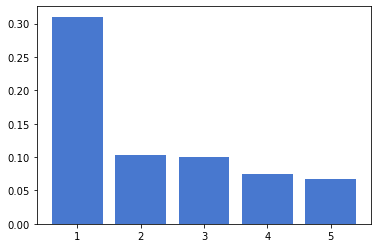

In [104]:
plt.bar(range(1,6),pca.explained_variance_ratio_)

In [105]:
pca.explained_variance_ratio_[0]

0.31022697415148637

In [106]:
print(f'{np.round(np.sum(pca.explained_variance_ratio_[:5])*100,2)} % of variance explained by the first 5 PCs')

65.29 % of variance explained by the first 5 PCs


Text(0.5, 1.0, 'First PC')

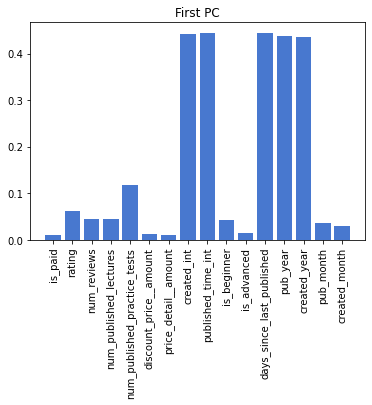

In [107]:
plt.bar(X_train.columns, abs(pca.components_[0]))
plt.xticks(rotation=90)
plt.title('First PC')

Text(0.5, 1.0, 'Second PC')

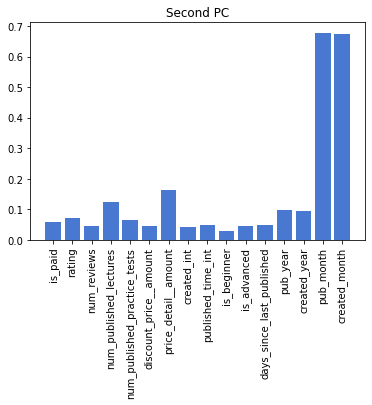

In [108]:
plt.bar(X_train.columns, abs(pca.components_[1]))
plt.xticks(rotation=90)
plt.title("Second PC")

## Modeling

### Establishing a baseline

In [109]:
from sklearn.metrics import mean_absolute_error

# Predict everything as mean
baseline_mae_mean = mean_absolute_error(y_valid, np.repeat(y_train.mean(), y_valid.shape[0]))
print(f'MAE with predicting target of validation set as mean of y_train: {np.round(baseline_mae_mean)}')

MAE with predicting everything as mean of y_train: 4054.0


### Model selection

### Linear regressor

In [110]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train_sc, y_train)

LinearRegression()

In [111]:
y_pred_lin_reg = lin_regressor.predict(X_valid_sc)
baseline_mae_lin_reg = mean_absolute_error(y_valid, y_pred_lin_reg)

In [112]:
print(f'MAE with a linear regressor: {np.round(baseline_mae_lin_reg,2)}')

MAE with a linear regressor: 2731.15


### Random Forests

In [113]:
!pip install optuna

In [114]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [115]:


# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     max_depth = trial.suggest_int('max_depth', 1, 15)
#     min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 0.5)
    
#     model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
#                                   min_samples_split=min_samples_split, random_state=1,
#                                  criterion='mae')
#     return -np.mean(cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, 
#                                      scoring='neg_mean_absolute_error'))

# study = optuna.create_study(direction='minimize')
# # optuna.logging.set_verbosity(optuna.logging.DEBUG)
# study.optimize(objective, n_trials=10,show_progress_bar=True)

# study.best_params

__Output of optuna__:

[I 2023-01-29 17:31:28,349] Trial 0 finished with value: 2621.196732644815 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 0.11766081677433533}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:32:21,850] Trial 1 finished with value: 2754.343593488501 and parameters: {'n_estimators': 68, 'max_depth': 1, 'min_samples_split': 0.2537943154339913}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:33:57,343] Trial 2 finished with value: 2642.703777655428 and parameters: {'n_estimators': 59, 'max_depth': 4, 'min_samples_split': 0.3779806365288625}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:36:46,573] Trial 3 finished with value: 2649.2298597477247 and parameters: {'n_estimators': 111, 'max_depth': 9, 'min_samples_split': 0.45465887241466474}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:38:47,309] Trial 4 finished with value: 2639.4064931811868 and parameters: {'n_estimators': 70, 'max_depth': 7, 'min_samples_split': 0.2957963759349319}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:41:01,888] Trial 5 finished with value: 2636.3704379431156 and parameters: {'n_estimators': 66, 'max_depth': 7, 'min_samples_split': 0.21512562635688326}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:44:33,356] Trial 6 finished with value: 2641.750777516615 and parameters: {'n_estimators': 122, 'max_depth': 9, 'min_samples_split': 0.35169611926532685}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:48:31,959] Trial 7 finished with value: 2648.28846626452 and parameters: {'n_estimators': 143, 'max_depth': 14, 'min_samples_split': 0.4515552478955548}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:49:51,304] Trial 8 finished with value: 2651.718427375764 and parameters: {'n_estimators': 53, 'max_depth': 2, 'min_samples_split': 0.37111976297026406}. Best is trial 0 with value: 2621.196732644815.

[I 2023-01-29 17:53:12,220] Trial 9 finished with value: 2649.3462787916005 and parameters: {'n_estimators': 126, 'max_depth': 12, 'min_samples_split': 0.47903106073008883}. Best is trial 0 with value: 2621.196732644815.

{'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 0.11766081677433533}

In [116]:
# final_rf_model = RandomForestRegressor(n_estimators=77, max_depth=4, 
#                                   min_samples_split=0.1176608167743353, random_state=1,
#                                  criterion='mae')
# final_rf_model.fit(X_train_sc, y_train)

KeyboardInterrupt: 

### KNN Regressor

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn_params = {
    'n_neighbors': [3,5,9,11,15],
}

knn_search = GridSearchCV(knn, knn_params, scoring='neg_mean_absolute_error', 
                               n_jobs=-1, cv=5)
knn_result = knn_search.fit(X_train_sc, y_train)

print('[KNN] Best Score: %s' % -knn_result.best_score_)
print('[KNN] Best Hyperparameters: %s' % knn_result.best_params_)

y_pred_best_knn = knn_search.predict(X_valid_sc)

print("[KNN] Best MAE: ", mean_absolute_error(y_valid, y_pred_best_knn))

[KNN] Best Score: 3082.4876645140175
[KNN] Best Hyperparameters: {'n_neighbors': 11}
[KNN] Best MAE:  2897.796771361686


### Discussion on the models

Since KNN does achieves slightly worse performance than RFs and LR it will be discarded. Random forest themselves are not as interpretable but one could at least extract feature importances.

We will also take a look at the linear regressor model as it achieves comparable performance to RFs but is much simpler to interpret. 
We also add LASSO regularization to the linear regression model.

### "Interpreting" the best RF and LR models

Random forest feature importances:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

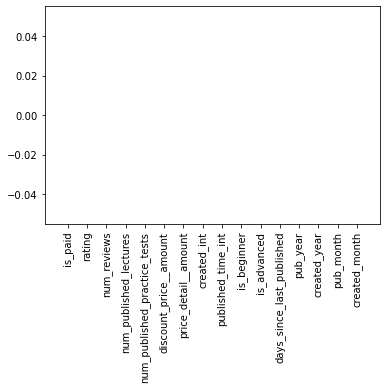

In [118]:
# pd.DataFrame([ X_train.columns,rf_search.best_estimator_.feature_importances_]).T
plt.bar(X_train.columns,final_rf_model.feature_importances_)
plt.xticks(rotation=90)

Linear regression coeffs (Without LASSO):

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

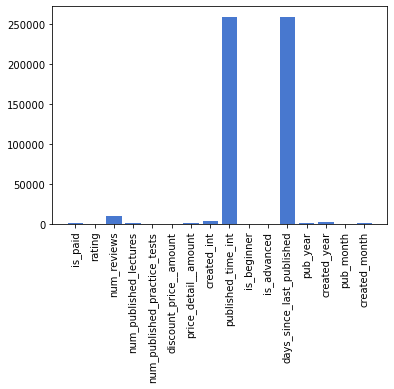

In [119]:
plt.bar(X_train.columns,np.abs(lin_regressor.coef_))
plt.xticks(rotation=90)

### Hyperparameter optimization

Since the linear regressor has been chosen as the most suitable model, it has no hyperparameters in its base form. We will use LASSO regularization however to remove any noisy attributes that might affect the model.

In [131]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso


# Create LassoCV tolasso_pathd the best alpha automatically
lasso_cv = LassoCV(cv=5, random_state=1,max_iter=10000)
lasso_cv.fit(X_train_sc, y_train)

# Create Lasso model with the best alpha found by LassoCV
lasso_best_cv = Lasso(alpha=lasso_cv.alpha_)
lasso_best_cv.fit(X_train_sc, y_train)


Lasso(alpha=1678.0721329797525)

In [132]:
mean_maes = [x.mean() for x in lasso_cv.mse_path_]

Text(0, 0.5, 'Mean MAE (CV)')

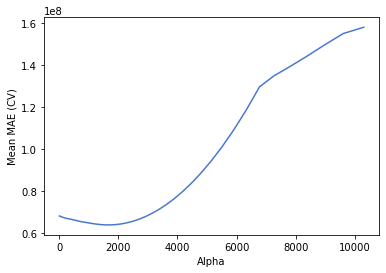

In [133]:
plt.plot(lasso_cv.alphas_,mean_maes, '-')
plt.xlabel('Alpha')
plt.ylabel('Mean MAE (CV)')

Alpha chosen by CV : 1678.07

In [134]:
y_pred_lasso_cv = lasso_best_cv.predict(X_valid_sc)

In [135]:
valid_mae_cv = mean_absolute_error(y_valid, y_pred_lasso_cv)

In [136]:
print(f"Validation MAE with CV alpha: {valid_mae_cv}")

Validation MAE: 2931.1520451331407


Text(0, 0.5, 'Coefficients')

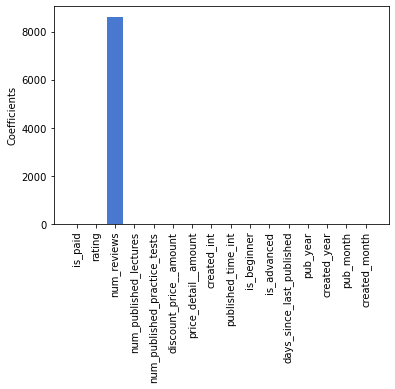

In [151]:
plt.bar( X_train.columns, (lasso_best_cv.coef_))
plt.xticks(rotation=90)
plt.ylabel('Coefficients')

We notice that published time and days before the last course was published are completely ignored by the regularized model. This stands in contrast with the simple LR model which used predominantly these two attributes to predict the target. Since the best model found with CV ignores all attributes except num_reviews, we will select the alpha parameter manually to have at least 4 coefficients that are not zero.

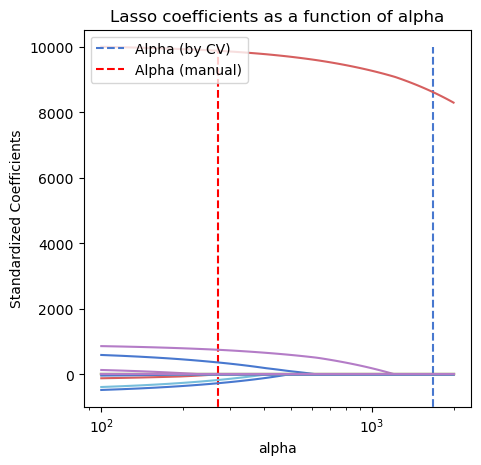

In [150]:
alphas = np.linspace(100,2000,100)
lasso_plot = Lasso(max_iter=1000)
coefs = []

for a in alphas:
    lasso_plot.set_params(alpha=a)
    lasso_plot.fit(X_train_sc, y_train)
    coefs.append(lasso_plot.coef_)

plt.figure(figsize=(5, 5), dpi=100)
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.vlines(lasso_cv.alpha_,-2000,10000, linestyles='dashed',label='Alpha (by CV)')
plt.vlines(270,-2000,10000,colors='r' , linestyles='dashed',label='Alpha (manual)')
plt.title('Lasso coefficients as a function of alpha')
plt.legend(loc='upper left')

In [146]:
manual_alpha = 270
lasso_manual = Lasso(alpha=manual_alpha)
lasso_manual.fit(X_train_sc, y_train)
lasso_manual.coef_

array([-267.46211226,    0.        , 9879.55895104,  753.19072891,
         -0.        , -168.80866544,  366.08066351,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ])

In [152]:
y_pred_lasso_manual = lasso_manual.predict(X_valid_sc)

In [153]:
valid_mae_manual = mean_absolute_error(y_valid, y_pred_lasso_manual)

In [154]:
print(f"Validation MAE with manual alpha: {valid_mae_manual}")

Validation MAE with manual alpha: 2751.635315074828


Text(0, 0.5, 'Coefficients')

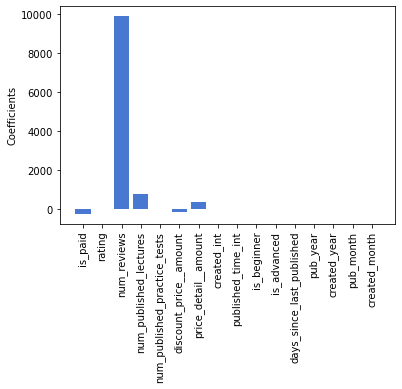

In [155]:
plt.bar( X_train.columns, (lasso_manual.coef_))
plt.xticks(rotation=90)
plt.ylabel('Coefficients')

### Model evaluation

#### Final model training only with train data



In [156]:
final_model_train = Lasso(alpha=270)
final_model_train.fit(X_train_sc, y_train)
y_pred_only_train = final_model_train.predict(X_test_sc) 

Calculating RMSE, MAE, MedAE for test set

In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
rmse_test_only_train = np.sqrt(mean_squared_error(y_test, y_pred_only_train))
mae_test_only_train = mean_absolute_error(y_test, y_pred_only_train)
medae_test_only_train = median_absolute_error(y_test, y_pred_only_train)

In [187]:
result_only_train = pd.DataFrame([['RMSE', 'MAE', 'MedAE'], 
                                  np.round([rmse_test_only_train, 
                                            mae_test_only_train, 
                                            medae_test_only_train])]).T
result_only_train

,0,1
0,RMSE,5776.0
1,MAE,3009.0
2,MedAE,1808.0


<BarContainer object of 3 artists>

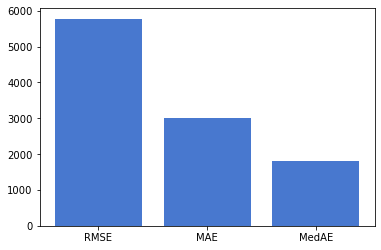

In [173]:
plt.bar(
    ['RMSE', 'MAE', 'MedAE'], 
    np.round([rmse_test_only_train, mae_test_only_train, medae_test_only_train]))

#### Refitting the model with both validation and train data

In [174]:
X_train_valid_sc = np.concatenate((X_train_sc,X_valid_sc),axis=0)

In [176]:
y_train_valid = pd.concat([y_train, y_valid], axis=0)

In [183]:

final_model_train_valid = Lasso(alpha=270)
final_model_train_valid.fit(X_train_valid_sc, y_train_valid)
y_pred_train_valid = final_model_train_valid.predict(X_test_sc) 

Calculating RMSE, MAE, MedAE for test set

In [184]:
rmse_test_both_train_valid = np.sqrt(mean_squared_error(y_test, y_pred_train_valid))
mae_test_both_train_valid = mean_absolute_error(y_test, y_pred_train_valid)
medae_test_both_train_valid = median_absolute_error(y_test, y_pred_train_valid)

In [188]:
result_both_train_valid = pd.DataFrame([
    ['RMSE', 'MAE', 'MedAE'], 
    np.round([rmse_test_both_train_valid, 
              mae_test_both_train_valid,
              medae_test_both_train_valid])]).T

result_both_train_valid

,0,1
0,RMSE,5774.0
1,MAE,2981.0
2,MedAE,1782.0


<BarContainer object of 3 artists>

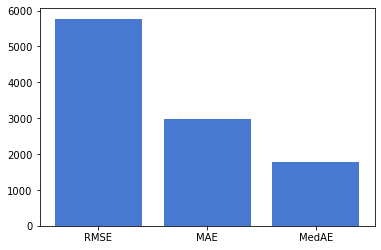

In [186]:
plt.bar(['RMSE', 'MAE', 'MedAE'], 
        np.round([rmse_test_both_train_valid, 
                  mae_test_both_train_valid, 
                  medae_test_both_train_valid]))

In [189]:
result_only_train[1]

0    5776.0
1    3009.0
2    1808.0
Name: 1, dtype: object

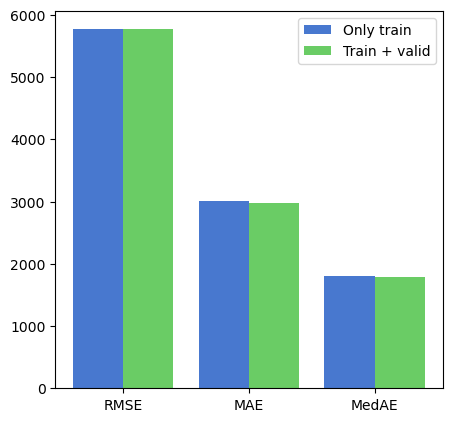

In [197]:
plt.figure(figsize=(5, 5), dpi=100)

width = 0.40
x = np.arange(3)
y1 = result_only_train[1]
y2 = result_both_train_valid[1]
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks(x, result_only_train[0])
plt.legend(['Only train', 'Train + valid'])

In [216]:
result_df = pd.DataFrame({'Only train':result_only_train[1],
                          'Train + valid' : result_both_train_valid[1],
                         'Metric': result_only_train[0]})
result_df = result_df.set_index('Metric')
result_df

,Only train,Train + valid
Metric,,
RMSE,5776.0,5774.0
MAE,3009.0,2981.0
MedAE,1808.0,1782.0


In [218]:
print(result_df.to_latex())

\begin{tabular}{lll}
\toprule
{} & Only train & Train + valid \\
Metric &            &               \\
\midrule
RMSE   &     5776.0 &        5774.0 \\
MAE    &     3009.0 &        2981.0 \\
MedAE  &     1808.0 &        1782.0 \\
\bottomrule
\end{tabular}



#### Baseline performance of a random regressor

In [223]:
n_test= y_test.shape[0]
y_pred_random_sample = y_train_valid.sample(n_test,random_state=1)

In [227]:
mae_random_baseline = mean_absolute_error(y_test, y_pred_random_sample)
rmse_random_baseline = np.sqrt(mean_squared_error(y_test, y_pred_random_sample))
medae_random_baseline = median_absolute_error(y_test, y_pred_random_sample)

random_baseline_df = pd.DataFrame([
    ['RMSE', 'MAE', 'MedAE'], 
    np.round([rmse_random_baseline, 
              mae_random_baseline,
              medae_random_baseline])]).T

random_baseline_df

,0,1
0,RMSE,13008.0
1,MAE,4514.0
2,MedAE,1213.0


#### Baseline performance of predicting everything as mean of training data

In [229]:
y_pred_mean = np.repeat(y_train_valid.mean(), y_test.shape[0])
mae_mean_baseline = mean_absolute_error(y_test, y_pred_mean)
rmse_mean_baseline = np.sqrt(mean_squared_error(y_test, y_pred_mean))
medae_mean_baseline = median_absolute_error(y_test, y_pred_mean)

mean_baseline_df = pd.DataFrame([
    ['RMSE', 'MAE', 'MedAE'], 
    np.round([rmse_mean_baseline, 
              mae_mean_baseline,
              medae_mean_baseline])]).T

mean_baseline_df

,0,1
0,RMSE,6337.0
1,MAE,3905.0
2,MedAE,3301.0


In [244]:
baseline_df = pd.DataFrame({'Random':random_baseline_df[1],
                          'Mean' : mean_baseline_df[1],
                         'Metric': result_only_train[0]})
baseline_df = baseline_df.set_index('Metric')
baseline_df

,Random,Mean
Metric,,
RMSE,13008.0,6337.0
MAE,4514.0,3905.0
MedAE,1213.0,3301.0


### Comparing final to baselines

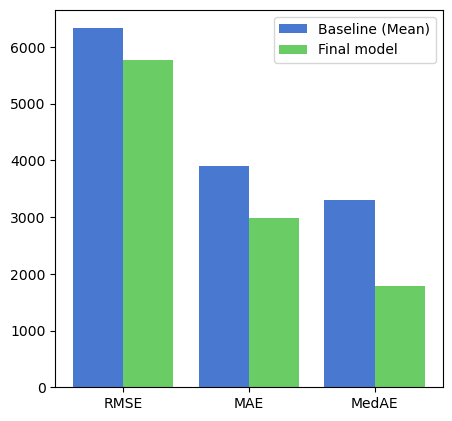

In [247]:
plt.figure(figsize=(5, 5), dpi=100)

width = 0.4
x = np.arange(3)
y1 = baseline_df['Mean']
y2 = result_df['Train + valid']
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, result_only_train[0])
plt.legend(['Baseline (Mean)', 'Final model'])

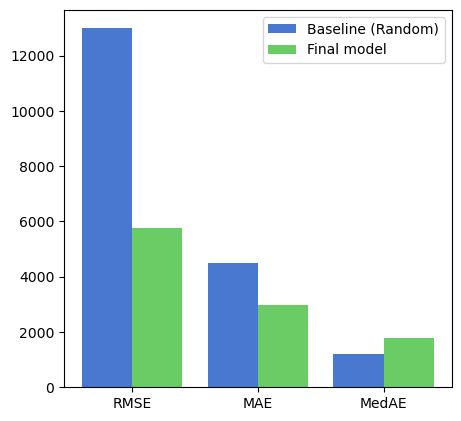

In [249]:
plt.figure(figsize=(5, 5), dpi=100)

width = 0.4
x = np.arange(3)
y1 = baseline_df['Random']
y2 = result_df['Train + valid']
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, result_only_train[0])
plt.legend(['Baseline (Random)', 'Final model'])

#### Regression errors in different parts of test dataspace

Since all observations in test set are from 2020, we take a look at the MAE per month

In [271]:
X_test_examination = X_test.copy()
X_test_examination['AE'] = np.abs(y_test - y_pred_train_valid)

Text(0, 0.5, 'MAE')

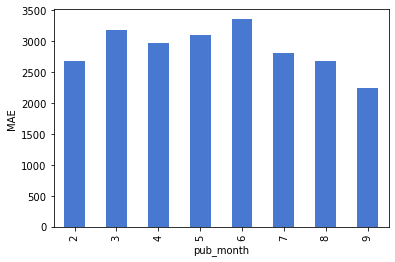

In [273]:
X_test_examination.groupby(X_test_examination["pub_month"])['AE'].mean().plot(kind="bar", legend=False)
plt.ylabel('MAE')

In [300]:
corr = X_test_examination[['num_reviews', 
                           'price_detail__amount', 
                           'discount_price__amount', 
                           'num_published_lectures',
                           'num_published_practice_tests',
                           'AE']].apply(np.log).corr().round(1)

num_reviews                     0.381004
price_detail__amount            0.274006
discount_price__amount         -0.025389
num_published_lectures          0.210590
num_published_practice_tests   -0.173550
AE                              1.000000
Name: AE, dtype: float64

<AxesSubplot:>

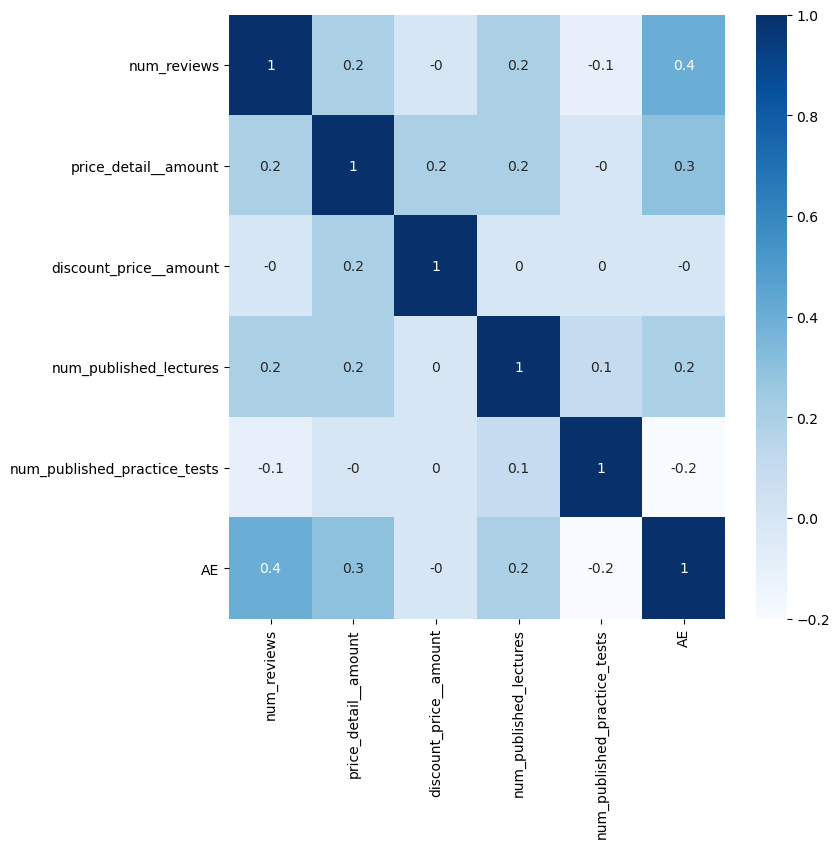

In [301]:
plt.figure(figsize=(8, 8), dpi=100)

sns.heatmap(corr,annot=True,xticklabels=True, cmap='Blues')

### Checking if there is bias in protected attr (is_paid)


In [251]:
print('Num of free courses in test set')
(X_test['is_paid'] == False).sum()

161

In [254]:
free_indices = X_test['is_paid'] == False

In [259]:
y_pred_free = y_pred_train_valid[free_indices]

In [257]:
paid_indices = X_test['is_paid'] == True

In [260]:
y_pred_paid = y_pred_train_valid[paid_indices]

In [263]:
mae_free = mean_absolute_error(y_test[free_indices] , y_pred_free)
mae_paid = mean_absolute_error(y_test[paid_indices] , y_pred_paid)

<BarContainer object of 2 artists>

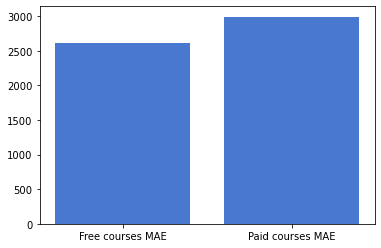

In [265]:
plt.bar(['Free courses MAE', 'Paid courses MAE'], [mae_free, mae_paid])